# Alberqisque, PY 03270

This is originally a FLIQ submission, authored by Abdullah, Jayesh, and Mack. Is a Jupyter-based educational game intended to familiarize the player to various quantum algorithms, with classical counterparts. The game is designed to be played in a Jupyter notebook, and it is intended for use in a classroom setting. The game is based on the concept of a "quantum computer" and its ability to solve problems that are intractable for classical computers. The game is designed to be played by students who are familiar with the basics of quantum computing, and it is intended to be used as a teaching tool.

Additionally, you will also learn how to use the Conda environment manager, and Jupyterlab, allowing you to switch between Python versions and run Python on an interactive environment.

## Plot

John Doe, a salesman at the quint Qiskit County of Pythonidae, has to solve an intractable problem. He has to find the best route to visit all the customers in his territory, which is represented as a graph. The graph is defined by a set of vertices (customers) and edges (roads). The residents of this county is concerned about the failing infrastructure of the roads, and they want to know if the roads are still in good condition. John has to find the best route to visit all the customers, while also taking into account the condition of the roads. He can only visit each customer once, and he has to return to his starting point. 

Sincerely,

Xixa Starova ✨ 🇦🇱

## Chapter 0: Qiskit, Jupyter, and Hello World

Before we start our journey, we need to know about the specialty of Qiskit, the main export of Alberqisque. Designed by IBM, Qiskit is a premier quantum computing framework allowing developers and researchers to quickly design quantum and hybrid quantum-classical circuits in Python. The main components of Qiskit is its software development kit (supplying the circuit library and transpilers), and the runtime environment (which supplies methods for running a quantum circuit on either a simulator or a real machine).

There are many related open-source projects that use the "Qiskit" name, but are not part of Qiskit itself; rather, they interface with Qiskit to provide valuable second-order functionality. Qiskit Aer is one such package that interfaces with Qiskit, providing quantum computing simulators with realistic noise models; moreover it is also maintained by IBM Quantum.

We also need to be acquainted with Jupyter, which allows you to interactively run Python code in a code editor (such as Visual Studio Code), and related mathematical libraries. To run Jupyter on Visual Studio Code, you need to install the `ipykernel` package.

### Prerequisites

* A _Tier 1_ platform
    * 64-bit Windows 10 or 11
    * MacOS
    * Linux x86_64, ARM64, or AArch64
* Python 3.12 (Python 3.13 is currently incompatible)
* Optionally, a virtual environment
    * Vanilla .venv
    * Conda

### 0.1: Installing Qiskit

We will run Qiskit using Python. Recently, Qiskit is also a C framework. Qiskit is compatible with Python 3.12 (but not Python 3.13 at the time of writing). It is recommended to use Conda to create a virtual environment, and then use the Conda Forge channel to install the Qiskit modules. This allows easy switching between Python versions to ensure that you are using the compatible version of Python.

The SDK is simply named the `qiskit` package. The runtime is named the `qiskit-ibm-runtime` package. We will also use the `qiskit-aer` if necessary, as this related package is required for using simulators (the easy mode) of the game.

```bash
$ conda create -n qiskit2 python=3.12
$ conda activate qiskit2
```

If so, you can install Qiskit using the Conda Forge channel instead of pip:

```bash
$ conda install conda-forge::qiskit
$ conda install conda-forge::qiskit conda-forge::qiskit-ibm-runtime conda-forge::qiskit-aer
$ conda install conda-forge::jupyterlab conda-forge::ipykernel
```

We will also install auxiliary packages that are used for visualizating and adding further interactivity to the notebook.

```bash
$ conda install conda-forge::numpy conda-forge::matplotlib conda-forge::pylatexenc
```

However, there is one incompatibility that can be ersolved by force-reinstalling the `sqlite` package. Otherwise, you will see that `sqlite3_deserialize` is an undefined symbol in some `.so` file.

```bash
$ conda install conda-forge::libsqlite --force-reinstall
$ conda install conda-forge::sqlite --force-reinstall
```

### 0.2: Importing Qiskit packages

The mayor of Alberqisque, David Hamilton Israel, will introduce you to two facets of this quest: namely quantum computing, and the Qiskit platform. Israel will teach you how to build, display, and run the circuit using the `qiskit`, `qiskit-ibm-runtime`, and `qiskit-aer` packages. Each package has many subpackages; please explicitly list them when you need to use them.

If the first cell fails, it usually means that the packages are not installed, or that you are using an incompatible version of Python. Israel has already provided two lines that might fix the problem, by running `conda install conda-forge::libsqlite conda-forge::sqlite --force-reinstall`.

Auxiliary packages not involved with the actual quantum operations, such as MatPlotLib and PyGame will also be imported to visualize and animate the process and outputs of a quantum computation.

In [10]:
# qiskit (SDK) packages
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager

# qiskit-ibm-runtime (RE) packages
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Auxiliary packages
import matplotlib
import pylatexenc

# Test out if appropriate packages are used
(QuantumCircuit, Estimator, matplotlib)

(qiskit.circuit.quantumcircuit.QuantumCircuit,
 qiskit_ibm_runtime.estimator.EstimatorV2,
 <module 'matplotlib' from '/home/samaria/miniconda3/envs/qiskit2/lib/python3.12/site-packages/matplotlib/__init__.py'>)

### 0.3: Hello World

Israel will demonstrate how to build a simple quantum circuit, and how to express that in mathematical language. 

__Linear algebra__ and __probability theory__ is a prerequisite for the readiness of that subject, but you can easily pick up these skills by envisioning these topics from real life experience. 

In particular, a __vector__ can be seen as a direction, a point in Cartesian space, or an ordered tuple; a __matrix__ can be seen as the relationship between pairs of inputs and outputs; finally, __matrix multiplication__ can be seen as producing output entries simply from multiples of input entries as described by the matrix in parallel. The efficiencies of quantum computing all come from vectorizing linear algebra operations.

#### 0.3.1: Creating a Bell State circuit using the SDK

Let's construct a two-qubit quantum gate consisting of an $H$ gate on the zeroth qubit and a $CX$ gate on the first qubit controlled by the zeroth qubit. We then draw and measure the circuit on the $Z$ basis.

* The $H$ gate is the most basic gate which creates a superposition of the two qubits. 
    * An $H$ gate applied to a qubit in the $\left|0\right\rangle$ state (the starting state) transforms it to the superposition state $\frac{\left|0\right\rangle + \left|1\right\rangle}{\sqrt{2}}$. 
    * Visually, it can be seen as a full-sized disks with radius unity being split into two half-sized disks of radius $1/\sqrt{2}$, one on the slot zero, and one on slot one. 
    * The areas of the disks determine the probabilities of measuring the qubit in the state where that particular disk resides in. This is one of the postulates of quantum mechanics, called the __Born rule__.
* The $CX$ gates, equivalent to the controlled-NOT gate, is a two-qubit gate that flips the __target qubit__ if the __control qubit__ is in the $\left|1\right\rangle$ state.
    * This is the first gate that can create asymmetry and entanglement.
    * Unfortunately, this gate is not native to our quantum devices...
* The $Z$ basis is also called the computational basis. This is because states $\left|0\right\rangle$ and $\left|1\right\rangle$ are the two states that have special significance when meausred in this basis.
    * The word 'basis' can be visualized as the axes and unit lengths of a Cartesian coordinate system centered and oriented at a designated point on the map.
    * The measurement results on the $Z$ basis will always be a $+1$ or a $-1$. These are the __eigenvalues__ of the $Z$ operator, and is what we can directly see per measurement.
    * The basis vectors on the $Z$ basis are labelled as $\left|0\right\rangle$ and $\left|1\right\rangle$ respectively. These are the __eigenvectors__ of the $Z$ operator.

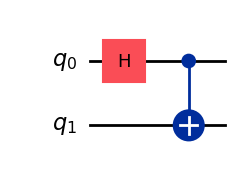

In [8]:
# Create a Bell Psi+ gate. In the Z basis, this is |00> + |11> unnormalized.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

#### 0.3.2a: Signing in to IBM Quantum

We need account credentials to run the circuit on a real quantum device. You can create an account at [IBM Quantum](https://quantum-computing.ibm.com/), create a __Qiskit Runtime Instance__, and obtain both the common __Cloud API Key__ and the __Cloud Resource Name (CRN)__.

In [14]:
# Save an IBM Cloud account.
IBM_CLOUD_API_KEY = input("Enter your IBM Cloud API key: ")
IBM_CLOUD_CRN = input("Enter your IBM Cloud CRN: ")
QiskitRuntimeService.save_account(channel="ibm_cloud", token=IBM_CLOUD_API_KEY, instance=IBM_CLOUD_CRN)

#### 0.3.1: Making the circuit compatible with our machines using the Runtime

When executing circuits on a real device, we must mind that each device may natively support a different set of gates. Our machines currently support the $X, RZ, and SX$ single-qubit gates, and the $CZ$ two-qubit gate. Recently, the fractional gates $RX$ and $RZZ$ gates are introduced ($RZZ$ performs a parallel $RZ$). Familiar gates you are first introduced such as the $CX$, $H$, and $Y$ gates are expressed in terms of the native gates.

In [15]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

/tmp/ipykernel_49300/1614038964.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

## Chapter 1: Your basic quantum algorithm

Your first chapter will introduce you to only basic quantum algorithms, without any reference to its classical counterpart.

## Chapter 2: Searching the pile

Your second chapter will introduce you to the Grover Search. John Doe needs to use the Grover Search to find the key that will provide him with a QAOA tool for his definitive problem.

## Chapter 3: Choosing the routes

Your third chapter will introduce you to QAOA and Hamiltonian energy optimization. The tools for this algorithm will provide John the best route to reallocate the various neighborhoods in this beleaguered county.